#Computer Vision Assignment: Fashion MNIST Classification
##Problem Statement
In this assignment, you will work with the Fashion MNIST dataset to classify clothing items. You'll learn basic image preprocessing techniques and build a simple CNN model for classification.

##Dataset Description
The Fashion MNIST dataset contains 28x28 grayscale images of clothes in 10 categories:

- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

##Step 1: Import Libraries and Load Data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import cv2
%matplotlib inline

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


##Step 2: Visualize Raw Images

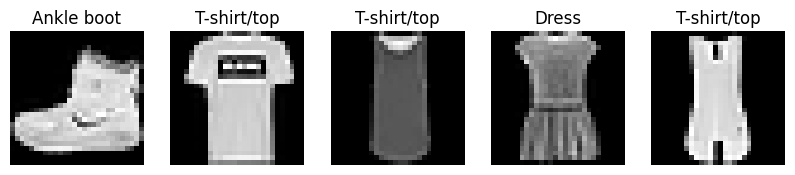

In [2]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first 5 images
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

##Step 3: Image Preprocessing

In [3]:
# Step 1: Resize Images
# Note: Fashion MNIST is already 28x28, but this shows how to resize
print("Original image shape:", X_train[0].shape)

X_train_resized = np.array([cv2.resize(img, (28, 28)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (28, 28)) for img in X_test])

print("Resized image shape:", X_train_resized[0].shape)



Original image shape: (28, 28)
Resized image shape: (28, 28)


In [4]:
# Step 2: Add Gaussian Noise and Denoise
# Adding noise to make model more robust
noise_factor = 0.2
X_train_noisy = X_train_resized + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_resized.shape)
X_test_noisy = X_test_resized + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_resized.shape)

# Simple denoising using Gaussian blur
X_train_denoised = np.array([cv2.GaussianBlur(img, (3,3), 0) for img in X_train_noisy])
X_test_denoised = np.array([cv2.GaussianBlur(img, (3,3), 0) for img in X_test_noisy])



In [5]:
# Step 3: Standardization (zero mean and unit variance)
# Reshape to 2D array for StandardScaler
X_train_flat = X_train_denoised.reshape(X_train_denoised.shape[0], -1)
X_test_flat = X_test_denoised.reshape(X_test_denoised.shape[0], -1)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Reshape back to image format
X_train_processed = X_train_scaled.reshape(X_train_denoised.shape)
X_test_processed = X_test_scaled.reshape(X_test_denoised.shape)



In [6]:
# Step 4: Normalization (scale to [0,1] range)
X_train_normalized = (X_train_processed - X_train_processed.min()) / (X_train_processed.max() - X_train_processed.min())
X_test_normalized = (X_test_processed - X_test_processed.min()) / (X_test_processed.max() - X_test_processed.min())



In [7]:
# Step 5: Reshape for CNN input (add channel dimension)
X_train_final = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_final = X_test_normalized.reshape(-1, 28, 28, 1)

# Visualize preprocessing steps for one image
plt.figure(figsize=(15,3))

plt.subplot(151)
plt.title('Original')
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')

plt.subplot(152)
plt.title('Noisy')
plt.imshow(X_train_noisy[0], cmap='gray')
plt.axis('off')

plt.subplot(153)
plt.title('Denoised')
plt.imshow(X_train_denoised[0], cmap='gray')
plt.axis('off')

plt.subplot(154)
plt.title('Standardized')
plt.imshow(X_train_processed[0], cmap='gray')
plt.axis('off')

plt.subplot(155)
plt.title('Normalized')
plt.imshow(X_train_normalized[0], cmap='gray')
plt.axis('off')

plt.show()

##Step 4: Build and Train Model

In [8]:
# Create a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_final, y_train,
                   epochs=10,
                   validation_data=(X_test_final, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.6196 - loss: 1.0610 - val_accuracy: 0.7779 - val_loss: 0.6079
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8013 - loss: 0.5346 - val_accuracy: 0.7817 - val_loss: 0.6115
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8276 - loss: 0.4696 - val_accuracy: 0.8119 - val_loss: 0.5161
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.8404 - loss: 0.4395 - val_accuracy: 0.8150 - val_loss: 0.5163
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.8497 - loss: 0.4165 - val_accuracy: 0.8130 - val_loss: 0.5233
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8559 - loss: 0.3984 - val_accuracy: 0.8326 - val_loss: 0.4801
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8635 - loss: 0.3738 - val_accuracy: 0.8329 - val_loss: 0.4783
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.8691 -

##Step 5: Evaluate Model

In [9]:
# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test_final, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Make predictions on test data
predictions = model.predict(X_test_final)
predicted_classes = np.argmax(predictions, axis=1)

# Show some predictions
plt.figure(figsize=(15,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[y_test[i]]}')
    plt.axis('off')
plt.show()


Test accuracy: 0.8375
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


###Assignment Tasks for Students:

1. Try different preprocessing techniques:

- Change the noise factor
- Try different blur kernel sizes
- Experiment with different normalization methods

2. Analysis:

- Compare accuracy with and without preprocessing
- Identify which types of clothes are most often misclassified